In [31]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

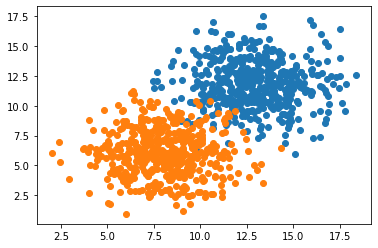

In [32]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T


 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [33]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam=Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')


Epoch 1/500
20/20 [==============================] - 0s 998us/step - loss: 1.9005 - accuracy: 0.4720
Epoch 2/500
20/20 [==============================] - 0s 995us/step - loss: 0.6910 - accuracy: 0.5850
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8640
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.9030
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.9210
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.9330
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2653 - accuracy: 0.9510
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 0.9580
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9570
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9590
Epoch

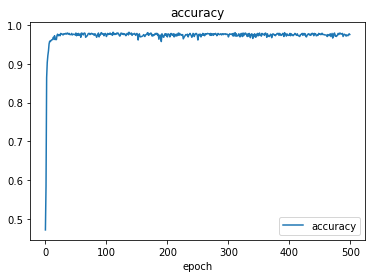

In [34]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

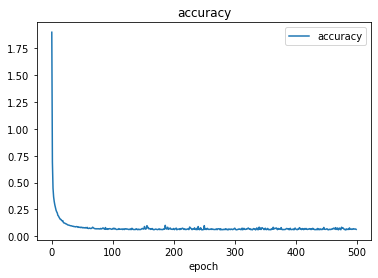

In [35]:
plt.plot(h.history['loss'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [36]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    

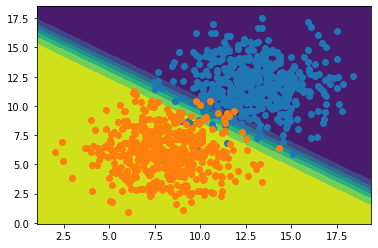

In [37]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.9999949]]


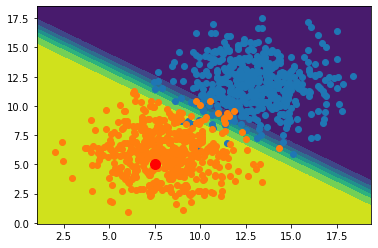

In [38]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o',markersize=10, color='red')
print("Prediction is:", prediction)